In [1]:
import os
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras

current_dir = os.path.abspath(os.getcwd())
folder = "/novo"
test_folder = current_dir + folder + "/test"

testImagemDrusen = test_folder+"/DRUSEN/DRUSEN-9800172-1.jpeg"
testImagemNormal = test_folder+"/NORMAL/NORMAL-4839633-1.jpeg"

2022-06-27 09:45:54.750104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-27 09:45:54.750153: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
model = keras.models.load_model("classificacao13.keras")

2022-06-27 09:45:56.133100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-27 09:45:56.133214: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-27 09:45:56.133269: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pc): /proc/driver/nvidia/version does not exist
2022-06-27 09:45:56.133704: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from matplotlib import pyplot as plt
def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 20, 'fontweight': 'medium'})
    plt.show()

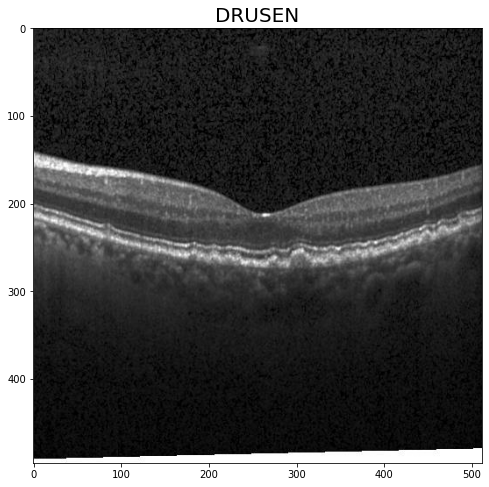

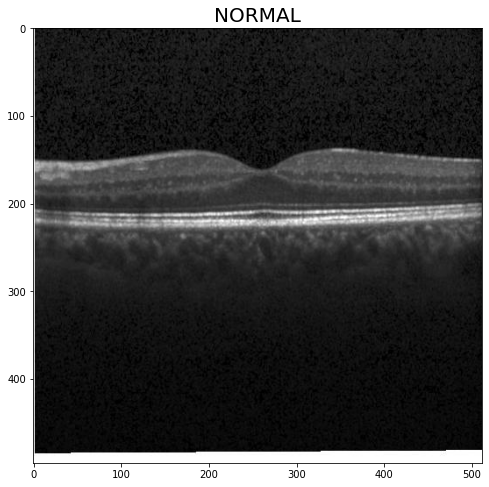

In [4]:
import cv2
drusen_img = cv2.imread(testImagemDrusen)
drusen_img = cv2.cvtColor(drusen_img, cv2.COLOR_BGR2RGB)

showSingleImage(drusen_img, "DRUSEN", (12, 8))

normal_img = cv2.imread(testImagemNormal)
normal_img = cv2.cvtColor(normal_img, cv2.COLOR_BGR2RGB)

showSingleImage(normal_img, "NORMAL", (12, 8))

In [5]:
from keras.preprocessing import image
import numpy as np

predict_img = image.load_img(testImagemDrusen, target_size=(180, 180))
x = image.img_to_array(predict_img)
x = np.expand_dims(x, axis=0)
pred=(model.predict(x) > 0.5).astype('int32')[0][0]

if pred == 1:
    print("Normal")
else:
    print("Drusen")
    
print(model.predict(x))

Drusen
[[1.0973833e-25]]


2022-06-27 09:45:57.301180: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
